<a href="https://colab.research.google.com/github/dnguyet06/B-i-t-p-AI/blob/main/v%C3%AD_d%E1%BB%A5_2_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 21.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#input
food=ctrl.Antecedent(np.arange(0,11,1),'food')
weight=ctrl.Antecedent(np.arange(0,11,1),'weight')
temperature=ctrl.Antecedent(np.arange(0,61,1),'temperature')
water=ctrl.Antecedent(np.arange(0,11,1),'water')
#output
time=ctrl.Consequent(np.arange(0,11,1),'time')
heat=ctrl.Consequent(np.arange(0,101,1),'heat')

In [ ]:
food['s']=fuzz.trimf(food.universe,[0,0,5])
food['m']=fuzz.trimf(food.universe,[3,5,10])
food['h']=fuzz.trimf(food.universe,[9,10,10])
weight['l']=fuzz.trimf(weight.universe,[0,0,5])
weight['m']=fuzz.trimf(weight.universe,[0,5,10])
weight['h']=fuzz.trimf(weight.universe,[5,10,10])
temperature['c']=fuzz.trimf(temperature.universe,[0,0,10])
temperature['m']=fuzz.trimf(temperature.universe,[9,25,30])
temperature['h']=fuzz.trimf(temperature.universe,[29,50,60])
water['l']=fuzz.trimf(water.universe,[0,0,5])
water['m']=fuzz.trimf(water.universe,[0,5,10])
water['h']=fuzz.trimf(water.universe,[5,10,10])
time['s']=fuzz.trimf(time.universe,[0,0,5])
time['m']=fuzz.trimf(time.universe,[0,5,10])
time['l']=fuzz.trimf(time.universe,[5,10,10])
heat['l']=fuzz.trimf(heat.universe,[0,0,30])
heat['m']=fuzz.trimf(heat.universe,[20,40,60])
heat['h']=fuzz.trimf(heat.universe,[50,80,100])

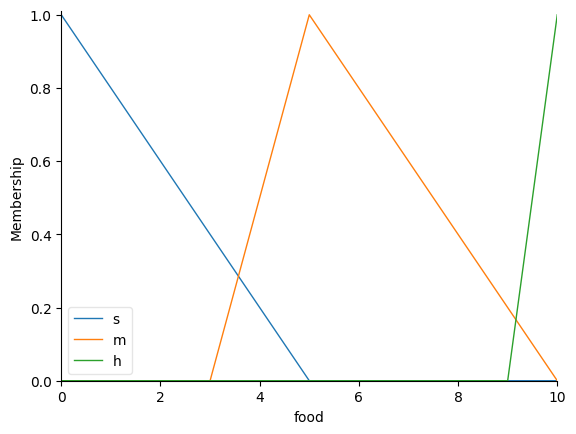

In [ ]:
food.view()

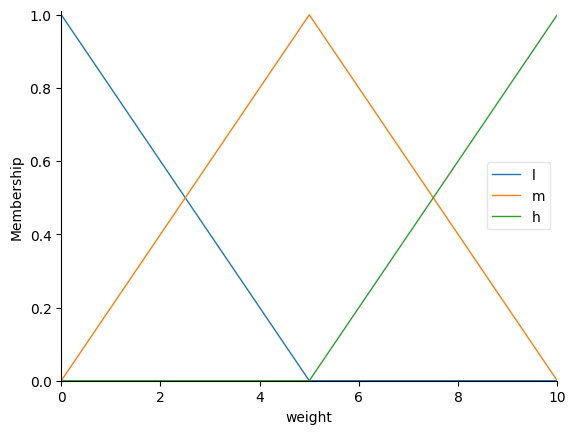

In [ ]:
weight.view()

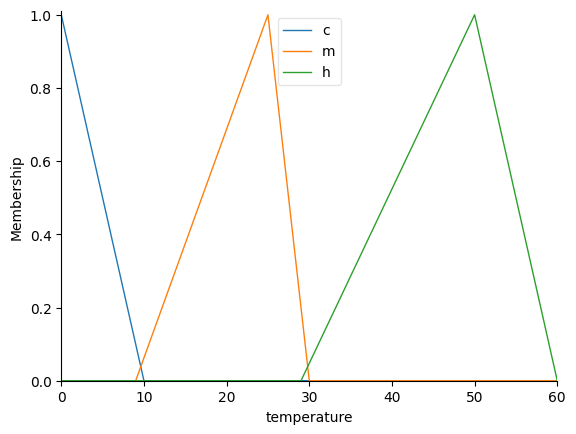

In [ ]:
temperature.view()

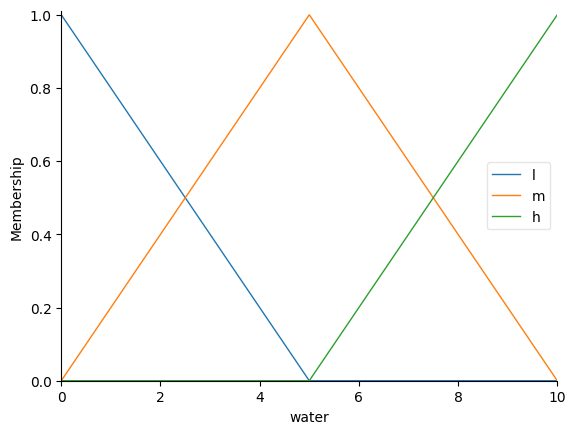

In [ ]:
water.view()

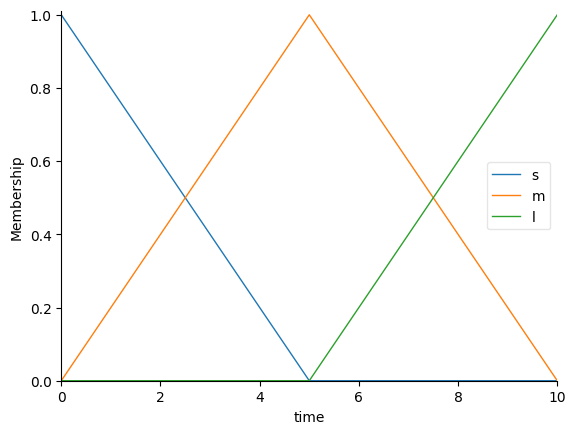

In [ ]:
time.view()


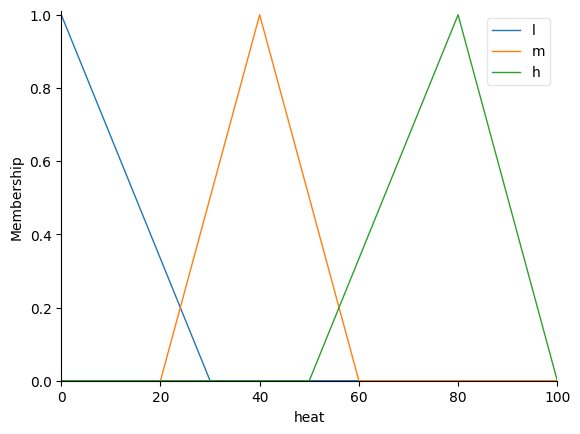

In [ ]:
heat.view()

In [ ]:
# Định nghĩa tập luật mờ
rule1 =ctrl.Rule(food['s'] &weight['l'],(time['s'],heat['l']))
rule2=ctrl.Rule(food['m'] & weight['m'], (time['m'],heat['m']))
rule3=ctrl.Rule(food['h'] & weight['h'], (time['l'],heat['h']))
rule4=ctrl.Rule(food['m'] & weight['l'], (time['s'],heat['l']))
rule5=ctrl.Rule(food['h']&temperature['c']& weight['m'], (time['m'],heat['m']))
rule6=ctrl.Rule(food['h']&temperature['m']& weight['m'], (time['l'],heat['h']))
rule7=ctrl.Rule(food['m']&temperature['h']& weight['m'], (time['s'],heat['l']))
rule8=ctrl.Rule(food['h']&temperature['c'], (time['m']))
rule9=ctrl.Rule(food['h']&temperature['m'], (time['l']))
rule10=ctrl.Rule(food['h']&water['l'], (time['s']))
rule11=ctrl.Rule(food['h']&water['m'], (time['m']))
rule12=ctrl.Rule(food['h']&water['h'], (time['l']))
rule13=ctrl.Rule(food['m']&water['l'], (time['s'],heat['l']))


4.6231884057971016
30.115485564304443


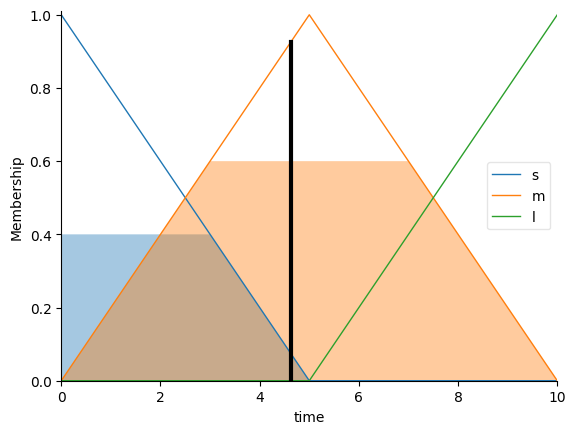

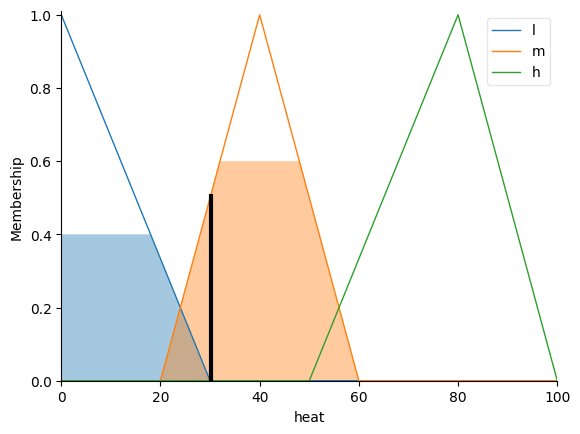

In [ ]:
cooker=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
sim=ctrl.ControlSystemSimulation(cooker)
sim.input['food']=5
sim.input['weight']=3
sim.input['temperature']=28
sim.input['water']=4
sim.compute()
print(sim.output['time'])
print(sim.output['heat'])
time.view(sim)
heat.view(sim)